In [5]:
import pymongo
import math 
# import re
import pandas as pd
import numpy as np
import pylab 
from matplotlib import pyplot as plt
# from scipy import stats 
from  qgrid import show_grid as show 
from datetime import datetime

import seaborn as sns
import re
import matplotlib as mpl 
%matplotlib inline
mpl.style.use('ggplot')
data=pd.read_csv("asplos/allmodes_dahu11.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,target,RAPL_ENERGY_DRAM_0,RAPL_ENERGY_DRAM_1,RAPL_ENERGY_PKG_0,RAPL_ENERGY_PKG_1,begin,end,entryNumber,...,RAPL_ENERGY_PKG_all,machineName,time,powers_av_all,type,methode,bench,class,Nbprocess,y_ax
0,0,592,normal_normal_LU_C_64_1,342.399178,372.121201,3376.661804,3383.335327,2019-06-07 09:17:41.231,2019-06-07 09:18:08.258,1,...,6759.997131,allmodes,27.027,241.428469,normal,normal,LU,C,64,normal normal
1,1,680,normal_normal_LU_C_64_2,348.203133,369.730347,3361.708282,3369.624054,2019-06-07 09:18:11.263,2019-06-07 09:18:38.309,2,...,6731.332336,allmodes,27.046,240.404726,normal,normal,LU,C,64,normal normal
2,2,769,normal_normal_LU_C_64_3,336.386330,356.747978,3252.055939,3259.133362,2019-06-07 09:18:41.315,2019-06-07 09:19:07.343,3,...,6511.189301,allmodes,26.028,241.155159,normal,normal,LU,C,64,normal normal
3,3,856,normal_normal_LU_C_64_4,339.952682,360.028137,3256.388550,3259.823425,2019-06-07 09:19:11.348,2019-06-07 09:19:37.377,4,...,6516.211975,allmodes,26.029,241.341184,normal,normal,LU,C,64,normal normal
4,4,940,normal_normal_LU_C_64_5,352.392540,367.602280,3358.213257,3365.592957,2019-06-07 09:19:40.383,2019-06-07 09:20:07.413,5,...,6723.806213,allmodes,27.030,240.135936,normal,normal,LU,C,64,normal normal


In [12]:
data2=pd.DataFrame()
data2["target"]=data["target"]
data2["benchmark"]=data["bench"]
data2["cpu"]=data["RAPL_ENERGY_PKG_all"]
data2["mode2"]=data["methode"]
data2["mode1"]=data["type"]
data2.head()

,target,benchmark,cpu,mode2,mode1
0,normal_normal_LU_C_64_1,LU,6759.997131,normal,normal
1,normal_normal_LU_C_64_2,LU,6731.332336,normal,normal
2,normal_normal_LU_C_64_3,LU,6511.189301,normal,normal
3,normal_normal_LU_C_64_4,LU,6516.211975,normal,normal
4,normal_normal_LU_C_64_5,LU,6723.806213,normal,normal


In [13]:
show(data2.groupby(["benchmark","mode1","mode2"])["cpu"].describe())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [24]:
data2.head()

,target,benchmark,cpu,mode2,mode1
0,normal_normal_LU_C_64_1,LU,6759.997131,normal,normal
1,normal_normal_LU_C_64_2,LU,6731.332336,normal,normal
2,normal_normal_LU_C_64_3,LU,6511.189301,normal,normal
3,normal_normal_LU_C_64_4,LU,6516.211975,normal,normal
4,normal_normal_LU_C_64_5,LU,6723.806213,normal,normal


In [25]:
data3=pd.read_csv("dahu15x2.csv")
data3=data3.drop(["begin","end","number"],axis=1)
data3.head()

,target,cpu,benchmark,mode1,mode2
0,cacheclean_normal_CG_C_32_1,1900.578644,CG,normal,cacheclean
1,cacheclean_normal_CG_C_32_10,1874.414276,CG,normal,cacheclean
2,cacheclean_normal_CG_C_32_100,1864.404266,CG,normal,cacheclean
3,cacheclean_normal_CG_C_32_11,1860.429260,CG,normal,cacheclean
4,cacheclean_normal_CG_C_32_12,1856.767548,CG,normal,cacheclean


In [31]:
show(data4.groupby(["benchmark","mode1","mode2"])["cpu"].describe())

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [26]:
data4=pd.concat([data3,data2])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [74]:
data3.read_csv("data-c-states.csv")

<Figure size 1440x720 with 0 Axes>

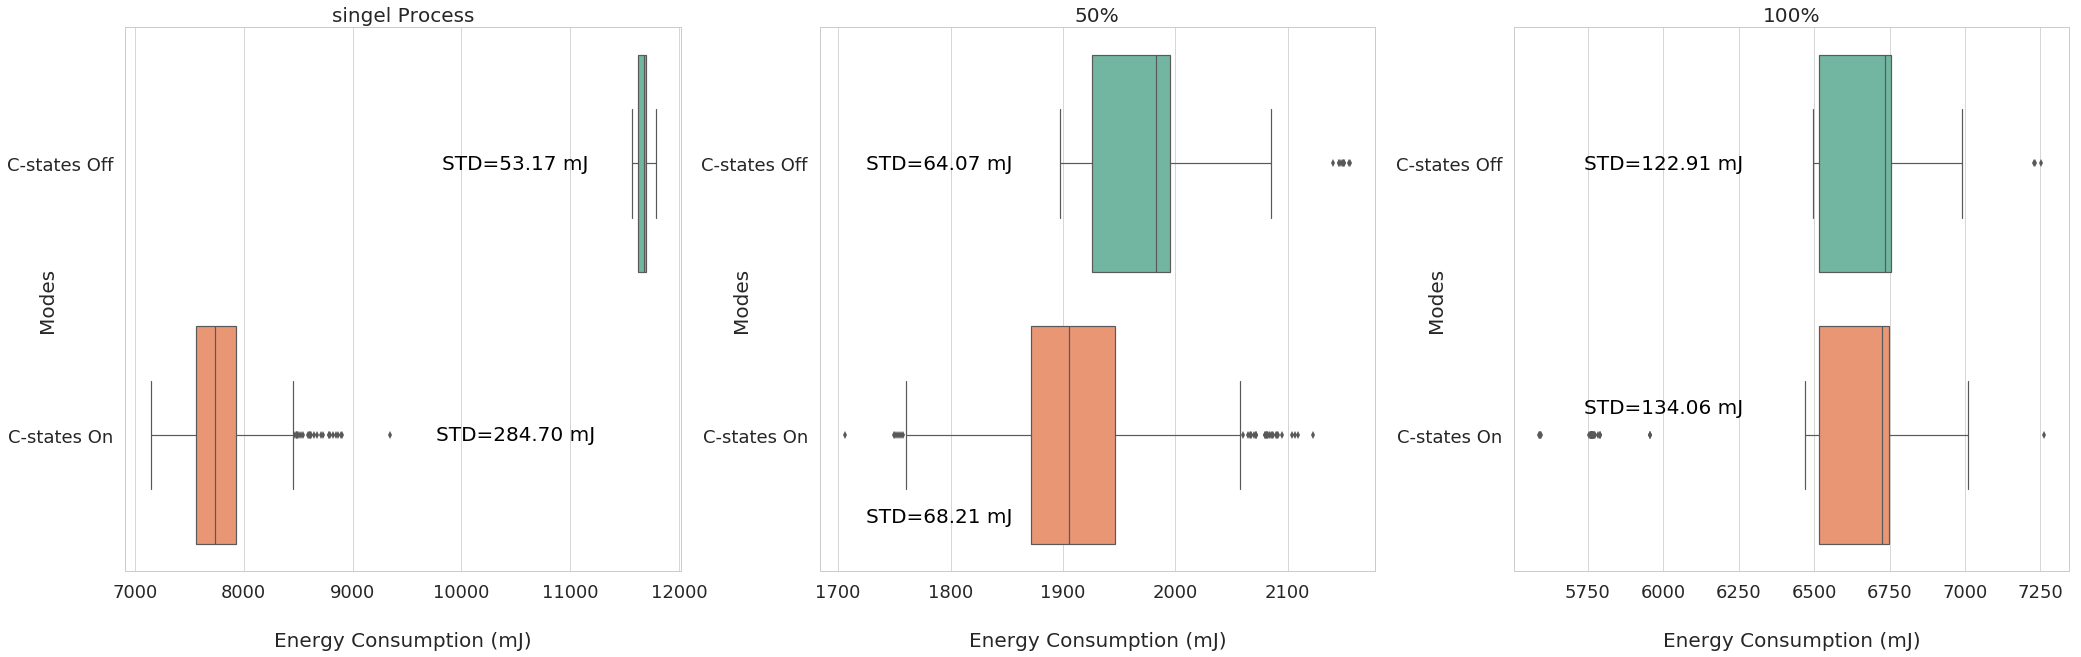

In [72]:
##### plt.style.use('seaborn')
sns.set_style("whitegrid") 
palette=sns.color_palette("Set2")
import matplotlib 
# matplotlib.rcParams['font.family'] = 'sans-serif'
# matplotlib.rcParams['font.sans-serif'] = ['besries']
fig=plt.figure(figsize=(20,10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20,"axes.tickarams.size":20})


# matplotlib.rc('font', **font)
# matplotlib.set(context="paper",rc=)
# pass in the font dict as kwargs
# matplotlib.rc('xlabel', labelsize=20) 
# Using seaborn's style
fig, axes = plt.subplots(1, 3, figsize=(30, 10),sharey=False)
plt.subplots_adjust(wspace=0.25,left = 0.08,right = 0.98)
data3=data4.copy()

data3=data3.loc[np.logical_or(data3["mode1"]=="normal",data3["mode1"]=="cstates")]
data3["mode1"]=data3["mode1"].apply(lambda row:"C-states Off" if row=="cstates" else "C-states On")
data3=data3.sort_values("mode1")
# data3=data2.loc[np.logical_or(data2["benchmark"]!="EP",data2["cpu"]<10000)]
# .loc[data2["sensor"]=="runningmodesxDahu2"]
# Plot
fig=sns.boxplot(data=data3.loc[data3["benchmark"]=="EP"],orient="h",y="mode1",x="cpu",palette=palette,ax=axes[0])
fig.set_ylabel(ylabel="Modes",labelpad=-50)
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=30)
fig.set_title("singel Process" )
fig.tick_params(labelsize=18)

#printing the STDs
fig.text(y=0,x=10500,s="STD=53.17 mJ",ha="center", va="center",color="black",size=20)
fig.text(y=1,x=10500,s="STD=284.70 mJ",ha="center", va="center",color="black",size=20)
########

fig=sns.boxplot(data=data3.loc[data3["benchmark"]=="CG"],y="mode1",x="cpu",orient="h",palette=palette,ax=axes[1])
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=30)
fig.set_ylabel(ylabel="Modes",labelpad=-50)
# fig.set_xlabel(xlabel="Modes",labelpad=30)
fig.set_title("50%" )
fig.tick_params(labelsize=18)

#printing the STDs
fig.text(y=0,x=1790,s="STD=64.07 mJ",ha="center", va="center",color="black",size=20)
fig.text(y=1.3,x=1790,s="STD=68.21 mJ",ha="center", va="center",color="black",size=20)
########


fig=sns.boxplot(data=data3.loc[data3["benchmark"]=="LU"],y="mode1",x="cpu",orient="h",palette=palette,ax=axes[2])
# fig.set_ylabel(ylabel="EC (mJ)")
# fig.set_xlabel(xlabel="Modes",labelpad=30)
fig.set_ylabel(ylabel="Modes",labelpad=-50)
fig.set_xlabel(xlabel="Energy Consumption (mJ)",labelpad=30)
fig.set_title("100%")
fig.tick_params(labelsize=18)
fig.text(y=0.9,x=6000,s="STD=134.06 mJ",ha="center", va="center",color="black",size=20)
fig.text(y=0,x=6000,s="STD=122.91 mJ",ha="center", va="center",color="black",size=20)
## adjust lines 
plt.savefig("c-states.pdf",format="pdf")
# plt.show()

In [17]:
def cleanData(data,groupobj=["typ","machineName"],measure="energy_PKG_all"): 
    l=pd.DataFrame()
    for j in data.groupby(groupobj): 
        dt=pd.DataFrame(j[1])
#         dt["type"]=j[0][0]
#         dt["machine Name"]=j[0][1]
        q1=dt[measure].quantile(0.25)
        q3=dt[measure].quantile(0.75)
        irq=q3-q1
        mini= q1-1.5*irq
        maxi= q3+1.5*irq
        dt=dt[((mini<=dt[measure]) & (dt[measure]<=maxi))]
        l=pd.concat([l,dt], sort=False)
    return l


<Figure size 1440x720 with 0 Axes>

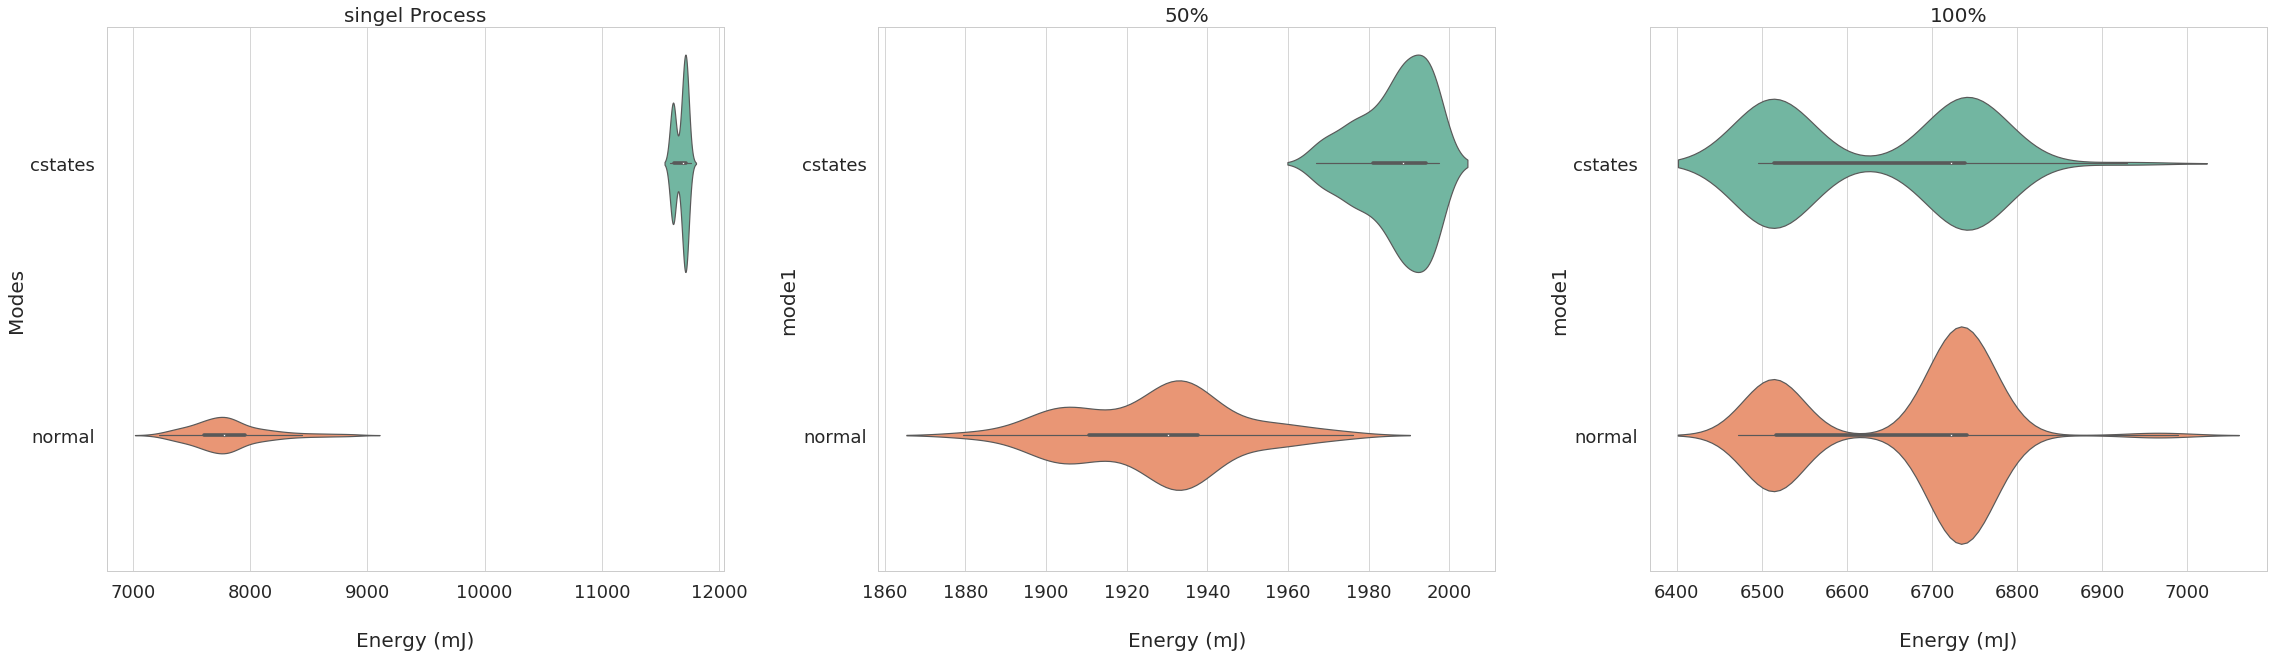

In [19]:
plt.style.use('seaborn')
sns.set_style("whitegrid") 
palette=sns.color_palette("Set2")
import matplotlib 
# matplotlib.rcParams['font.family'] = 'sans-serif'
# matplotlib.rcParams['font.sans-serif'] = ['besries']
fig=plt.figure(figsize=(20,10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20,"axes.tickarams.size":20})


# matplotlib.rc('font', **font)
# matplotlib.set(context="paper",rc=)
# pass in the font dict as kwargs
# matplotlib.rc('xlabel', labelsize=20) 
# Using seaborn's style
fig, axes = plt.subplots(1, 3, figsize=(30, 10),sharey=False)
plt.subplots_adjust(wspace=0.25,left = 0,right = 1)
data3=cleanData(data2,groupobj=["benchmark","mode1","mode2"],measure="cpu")

data3=data3.loc[np.logical_or(data3["mode1"]=="normal",data3["mode1"]=="cstates")]

# data3=data2.loc[np.logical_or(data2["benchmark"]!="EP",data2["cpu"]<10000)]
# .loc[data2["sensor"]=="runningmodesxDahu2"]
# Plot
fig=sns.violinplot(data=data3.loc[data3["benchmark"]=="EP"],orient="h",y="mode1",x="cpu",palette=palette,ax=axes[0])
fig.set_ylabel(ylabel="Modes")
fig.set_xlabel(xlabel="Energy (mJ)",labelpad=30)
fig.set_title("singel Process" )
fig.tick_params(labelsize=18)
fig=sns.violinplot(data=data3.loc[data3["benchmark"]=="CG"],y="mode1",x="cpu",orient="h",palette=palette,ax=axes[1])
fig.set_xlabel(xlabel="Energy (mJ)",labelpad=30)
# fig.set_xlabel(xlabel="Modes",labelpad=30)
fig.set_title("50%" )
fig.tick_params(labelsize=18)
fig=sns.violinplot(data=data3.loc[data3["benchmark"]=="LU"],y="mode1",x="cpu",orient="h",palette=palette,ax=axes[2])
# fig.set_ylabel(ylabel="EC (mJ)")
# fig.set_xlabel(xlabel="Modes",labelpad=30)
fig.set_xlabel(xlabel="Energy (mJ)",labelpad=30)
fig.set_title("100%")
fig.tick_params(labelsize=18)
## adjust lines 
plt.savefig("dahu15.pdf",format="pdf")
# plt.show()

In [60]:
data2=data.copy()
data2["sensor"]=data2["sensor"].apply(lambda row: "allmodesxDahu11xn2" if row == "allmodesxDahu11" else row)
data2=data2.loc[:,["target","sensor","benchmark","mode","mode2","number","cpu"]]
data2=data2.loc[data2["mode2"]!="cacheclean"]
data2["mode2"]=data2.apply(lambda row: "sleep"if row["mode"]=="sleep"else row["mode2"],axis=1)

In [61]:
show(data2)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [77]:
def cleanData(data,groupobj=["mode2","benchmark"],measure="cpu"): 
    l=pd.DataFrame()
    for j in data.groupby(groupobj): 
        dt=pd.DataFrame(j[1])
#         dt["type"]=j[0][0]
#         dt["machine Name"]=j[0][1]
        q1=dt[measure].quantile(0.25)
        q3=dt[measure].quantile(0.75)
        irq=q3-q1
        mini= q1-1.5*irq
        maxi= q3+1.5*irq
        dt=dt[((mini<=dt[measure]) & (dt[measure]<=maxi))]
        l=pd.concat([l,dt], sort=False)
    return l


<Figure size 1440x720 with 0 Axes>

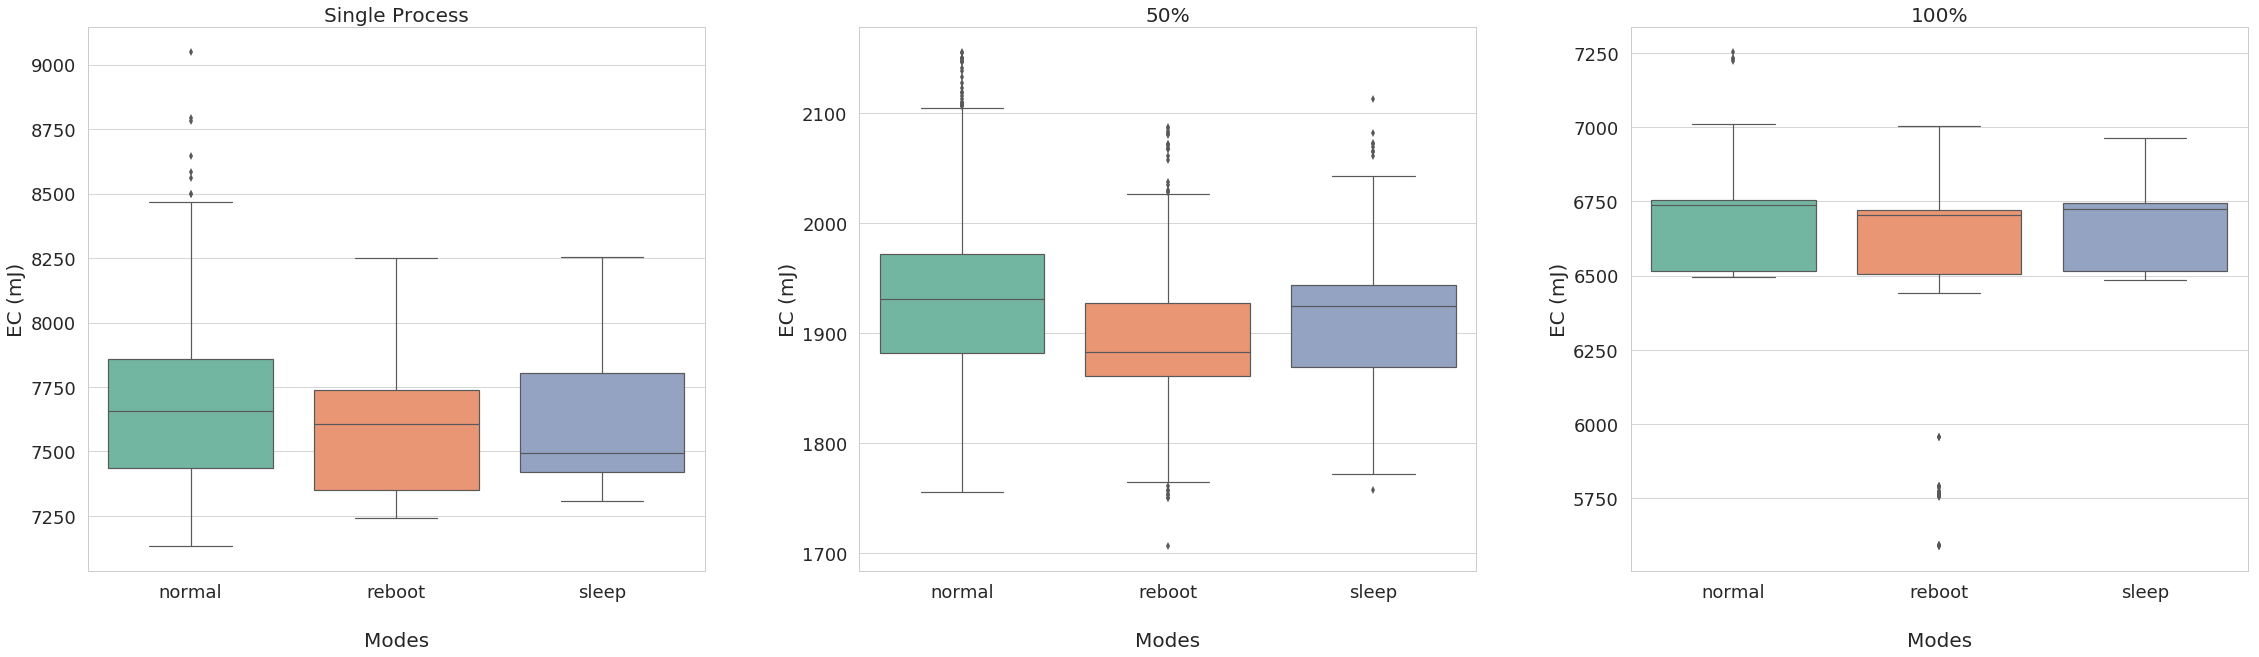

In [195]:
plt.style.use('seaborn')
sns.set_style("whitegrid") 
palette=sns.color_palette("Set2")
import matplotlib 
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['besries']
fig=plt.figure(figsize=(20,10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20,"axes.tickarams.size":20})


# matplotlib.rc('font', **font)
# matplotlib.set(context="paper",rc=)
# pass in the font dict as kwargs
# matplotlib.rc('xlabel', labelsize=20) 
# Using seaborn's style
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
plt.subplots_adjust(wspace=0.25,left = 0,right = 1)
data3=data2.loc[np.logical_or(data2["benchmark"]!="EP",data2["cpu"]<10000)]
# .loc[data2["sensor"]=="runningmodesxDahu2"]
# Plot
fig=sns.boxplot(data=data3.loc[data3["benchmark"]=="CG"],x="mode2",y="cpu",palette=palette,ax=axes[1])
fig.set_ylabel(ylabel="EC (mJ)")
fig.set_xlabel(xlabel="Modes",labelpad=30)
fig.set_title("50%" )
fig.tick_params(labelsize=18)
fig=sns.boxplot(data=data3.loc[data3["benchmark"]=="LU"],x="mode2",y="cpu",palette=palette,ax=axes[2])
fig.set_ylabel(ylabel="EC (mJ)")
fig.set_xlabel(xlabel="Modes",labelpad=30)
fig.set_title("100%" )
fig.tick_params(labelsize=18)
fig=sns.boxplot(data=data3.loc[data3["benchmark"]=="EP"],x="mode2",y="cpu",palette=palette,ax=axes[0])
fig.set_ylabel(ylabel="EC (mJ)")
fig.set_xlabel(xlabel="Modes",labelpad=30)
fig.set_title("Single Process")
fig.tick_params(labelsize=18)
## adjust lines 
plt.savefig("running-process.pdf",format="pdf")

In [177]:
def bootstrap(energy,groupbyobj="mode2",sampleSize=40): 
    l=[(energy.loc[energy[groupbyobj]==x ],x) for x in energy[groupbyobj].drop_duplicates() ]
#     l=[np.random.choice(x["cpu"], size=(5000, sampleSize))for x in l]
#     return l
    l=[(np.random.choice(i["cpu"], size=(5000, sampleSize)),j) for i,j in l ]
    l=[(np.std(i,1),j) for i,j in l]
    l2=[]
    for i,j in l:
        data=pd.DataFrame()
        data["val"]=i
        data[groupbyobj]=j
        l2.append(data)
    return l,pd.concat(l2)


energylu=data2.loc[data2["benchmark"]=="LU"]
e3,_=bootstrap(energylu)
e4,_=bootstrap(data3.loc[data2["benchmark"]=="LU"])

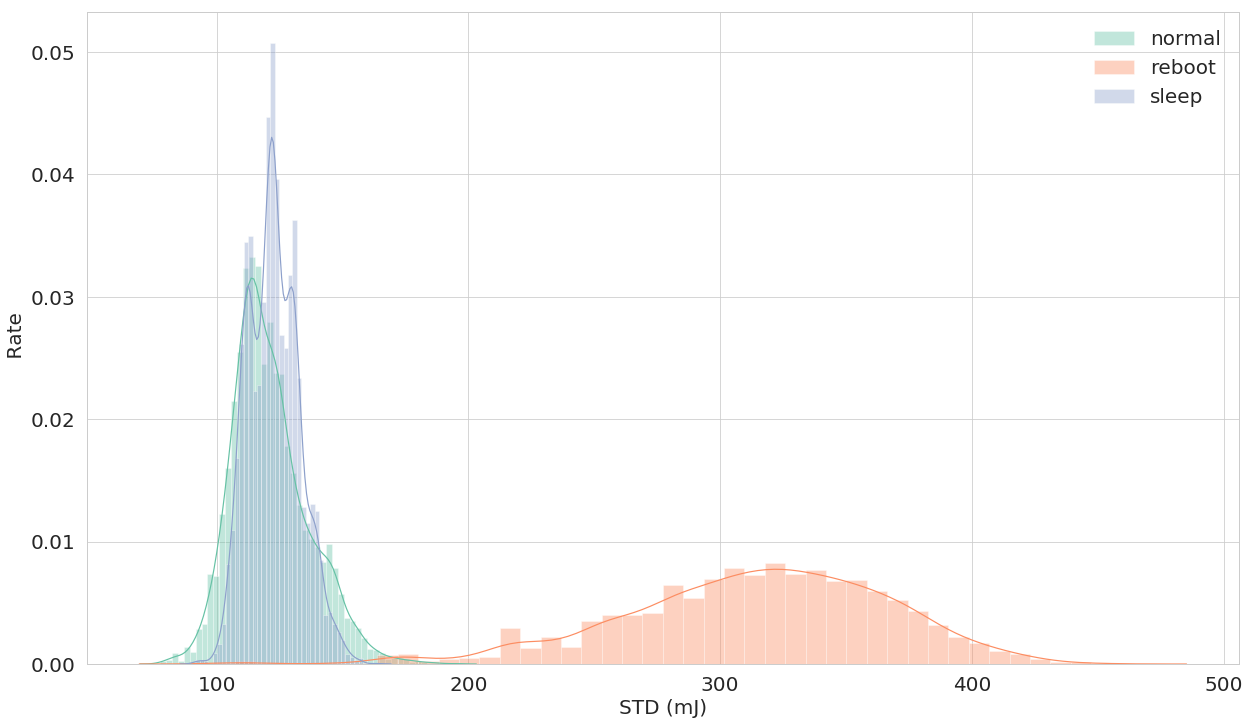

In [226]:

fig = plt.figure(figsize=(20,12))
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20,"axes.tickarams.size":20})
plt.subplots_adjust(left = 0.1,right = 0.9)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.set_style("whitegrid")
colors={"normal":palette[0],"reboot":palette[1],"sleep":palette[2]}
for i,j in e3: 
    fig=sns.distplot(i,label=j,color=colors[j])
fig.legend(fontsize=20,)
fig.set_xlabel(xlabel="STD (mJ)")
fig.set_ylabel(ylabel=" Rate")
plt.savefig("reboot.png",format="pdf")

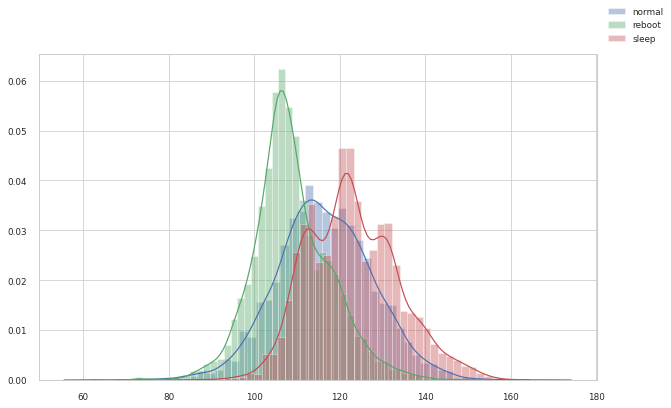

In [178]:
fig = plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
legends=[]
for i,j in e4: 
    sns.distplot(i,label=j)
    legends.append(j)
fig.legend(labels=legends)

plt.show()